# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-08-11 09:27:37.149078: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('019.Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(X, columns=dataset.columns[3:-1])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.0,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.0,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Encoding categorical data

#### Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
pd.DataFrame(X, columns=dataset.columns[3:-1])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.0,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.8,3,1,0,113931.57
3,699,France,0,39,1,0.0,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.0,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.0,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


#### One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
columns = ['Geography [0]', 'Geography [1]', 'Geography [2]', 'CreditScore'] + list(dataset.columns[5:-1])
pd.DataFrame(X, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
pd.DataFrame(X_train, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.014607,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-1.014607,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,0.985604,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,-1.014607,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-1.014607,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.014607,1.754865,-0.573694,-0.582970,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,-1.014607,-0.569844,1.743090,1.478815,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.985604,-0.569844,-0.573694,0.901515,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-1.014607,-0.569844,1.743090,-0.624205,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

2024-08-11 09:27:38.280954: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-11 09:27:38.281501: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-08-11 09:27:38.361416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-11 09:27:38.364016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4060 Laptop GPU computeCapability: 8.9
coreClock: 2.01GHz coreCount: 24 deviceMemorySize: 7.63GiB deviceMemoryBandwidth: 238.45GiB/s
2024-08-11 09:27:38.364029: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-08-11 09:27:38.365057: I tensorflow/stream_executor/p

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [18]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

2024-08-11 09:27:39.372820: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-08-11 09:27:39.373088: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3793035000 Hz
2024-08-11 09:27:39.512345: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


Epoch 1/50
250/250 [==============================] - 1s 579us/step - loss: 0.6572 - accuracy: 0.5945
Epoch 2/50
250/250 [==============================] - 0s 625us/step - loss: 0.4937 - accuracy: 0.7889
Epoch 3/50
250/250 [==============================] - 0s 601us/step - loss: 0.4508 - accuracy: 0.7993
Epoch 4/50
250/250 [==============================] - 0s 584us/step - loss: 0.4355 - accuracy: 0.8133
Epoch 5/50
250/250 [==============================] - 0s 588us/step - loss: 0.4151 - accuracy: 0.8228
Epoch 6/50
250/250 [==============================] - 0s 587us/step - loss: 0.4063 - accuracy: 0.8201
Epoch 7/50
250/250 [==============================] - 0s 576us/step - loss: 0.4002 - accuracy: 0.8262
Epoch 8/50
250/250 [==============================] - 0s 590us/step - loss: 0.4105 - accuracy: 0.8185
Epoch 9/50
250/250 [==============================] - 0s 601us/step - loss: 0.4107 - accuracy: 0.8226
Epoch 10/50
250/250 [==============================] - 0s 597us/step - loss: 0.403

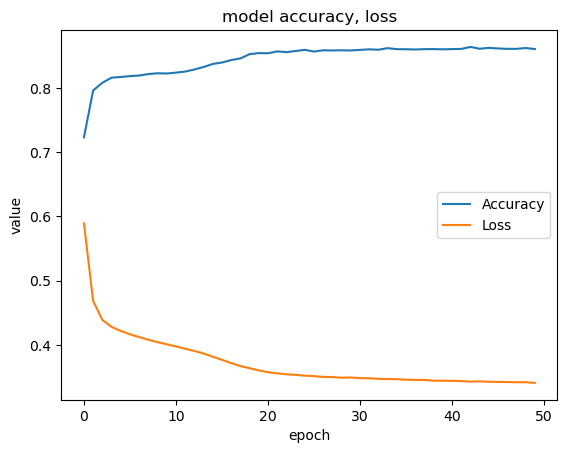

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy, loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [20]:
T = np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
pd.DataFrame(T, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0,0,600,1,40,3,60000,2,1,1,50000


In [21]:
T = sc.transform(T)
pd.DataFrame(T, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.985604,-0.569844,-0.573694,-0.521116,0.916013,0.109617,-0.68539,-0.256906,0.809503,0.642595,0.968738,-0.872033


In [22]:
print(ann.predict(T))

[[0.03611114]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

### Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cmDf = pd.concat([pd.DataFrame([['Customer will stay'], ['Customer will leave']], columns=['Predictions']), pd.DataFrame(cm, columns=['correct', 'incorrect'])], axis=1)
cmDf.set_index(['Predictions'])
cmDf

,Predictions,correct,incorrect
0,Customer will stay,1538,57
1,Customer will leave,211,194


In [25]:
accuracy_score(y_test, y_pred)

0.866